### Import libraries and modify notebook settings

In [ ]:
# Import libraries
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.utils import HDF5Matrix
from keras.utils import np_utils

# Modify notebook settings
%matplotlib inline

### Create paths to data folders and files

In [ ]:
# Create a variable for the project root directory
proj_root = os.path.join(os.pardir)

# Save path to the raw metadata file
# "UrbanSound8K.csv"
metadata_file = os.path.join(proj_root,
                             "data",
                             "raw",
                             "UrbanSound8K",
                             "metadata",
                             "UrbanSound8K.csv")

# Save path to the raw audio files
raw_audio_path = os.path.join(proj_root,
                             "data",
                             "raw",
                             "UrbanSound8K",
                             "audio")

# Save path to the raw audio files
fold1_path = os.path.join(raw_audio_path,
                          "fold1")


# Save the path to the folder that will contain 
# the interim data sets for modeling:
# /data/interim
interim_data_dir = os.path.join(proj_root,
                                "data",
                                "interim")


# Save the path to the folder that will contain 
# the interim trash data sets
# /data/interim
interim_trash_dir = os.path.join(interim_data_dir,
                                "trash")

## Save path to 'sample-level.hdf5'
hdf5_file_name = 'sample-level.hdf5'
hdf5_path = os.path.join(interim_trash_dir, hdf5_file_name)

In [ ]:
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(proj_root, "src")
sys.path.append(src_dir)

### Import code from `scr`

In [ ]:
from utils.bedtime import computer_sleep
from models.resnext1d import ResNext1D
from models.dualplotcallback import DualPlotCallback

### Create objects for X_train, y_train, X_test, & y_test

In [ ]:
X_train = HDF5Matrix(hdf5_path, 
                     'X_train_dset')

y_train = HDF5Matrix(hdf5_path, 
                     'y_train_dset')

X_test = HDF5Matrix(hdf5_path, 
                     'X_test_dset')

y_test = HDF5Matrix(hdf5_path, 
                     'y_test_dset')

In [ ]:
# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

# doodle

In [8]:
for i in range(10):
    print(i, ':\t', np.count_nonzero(np.equal(y_train, i)))

# Model

In [9]:
global_sr = 22050

In [80]:
inpu = X_train.shape[1:]
dept = 11 # 29
card = 1 # 2 # 8
widt = 32# 64
weig = 5e-4
clas = Y_train.shape[1]
crop = int(global_sr * 1)


#input_shape=None, depth=29, cardinality=8, width=64, weight_decay=5e-4,

model_resnext1d = ResNext1D(input_shape=inpu, 
                            depth=dept,
                            cardinality=card,
                            width=widt,
                            weight_decay=weig, 
                            classes=clas, cropping=crop)   

model_resnext1d.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model_resnext1d.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_12 (InputLayer)            (None, 88200, 1)      0                                            
____________________________________________________________________________________________________
random_cropping1d_12 (RandomCrop (None, 22050, 1)      0           input_12[0][0]                   
____________________________________________________________________________________________________
conv1d_323 (Conv1D)              (None, 22050, 32)     32          random_cropping1d_12[0][0]       
____________________________________________________________________________________________________
batch_normalization_188 (BatchNo (None, 22050, 32)     128         conv1d_323[0][0]                 
___________________________________________________________________________________________

    Total params: 2,219,392
    Trainable params: 2,208,640
    Non-trainable params: 10,752

    Total params: 28,931,584
    Trainable params: 28,888,576
    Non-trainable params: 43,008
    
    
    

Card 1, dept = 11:

    Total params: 176,992
    Trainable params: 174,304
    Non-trainable params: 2,688
    
Card 3, dept = 11:

    Total params: 1,157,664
    Trainable params: 1,149,600
    Non-trainable params: 8,064

Card 3, dept = 20:

    Total params: 2,136,096
    Trainable params: 2,122,656
    Non-trainable params: 13,440
    
Card 3, dept = 29:

    Total params: 3,114,528
    Trainable params: 3,095,712
    Non-trainable params: 18,816
    
Card 3, dept = 29:      [TOO MANY]  

    Total params: 4,092,960
    Trainable params: 4,068,768
    Non-trainable params: 24,192


In [81]:
x = 1
(9 * x) + 2

11

In [82]:
x = 2
(9 * x) + 2

20

In [83]:
x = 3
(9 * x) + 2

29

In [84]:
x = 4
(9 * x) + 2

38

In [85]:
print('card 3 # params: \t{:,}'.format(1157664 + 1149600 + 8064))

card 3 # params: 	2,315,328


In [86]:
print('card 3 / card 1 \t{:.2f}'.format((1157664 + 1149600 + 8064) / (176992 + 174304 + 2688)))

card 3 / card 1 	6.54


# ...

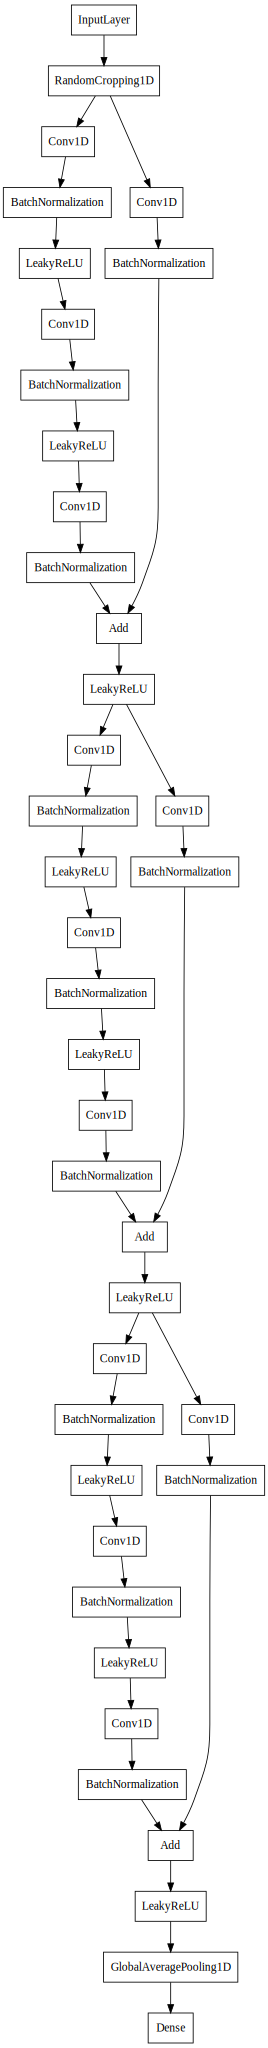

In [87]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model_resnext1d, 
                 show_layer_names=False, 
                 show_shapes=False).create(prog='dot', format='svg'))


In [88]:
log_file_fn = 'log_trash.csv'
my_log_file_path = os.path.join(interim_trash_dir, log_file_fn)

log_fig_fn = 'log_fig.png'
my_log_fig_path = os.path.join(interim_trash_dir, log_fig_fn)

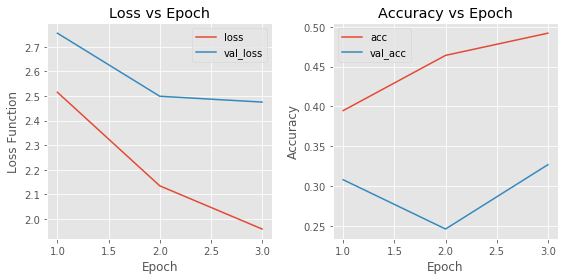

5740/5740 [==============================] - 7244s - loss: 1.9589 - acc: 0.4920 - val_loss: 2.4752 - val_acc: 0.3268
                                          

In [96]:
# fit
model_resnext1d.fit(X_train, Y_train,
                    batch_size=2, epochs=3, verbose=1,
                    callbacks=[DualPlotCallback(log_file_path=my_log_file_path, 
                                                log_fig_path=my_log_fig_path)],
                    validation_data=(X_test, Y_test),
                    shuffle="batch")

# sleep after training
computer_sleep(seconds_until_sleep=10, verbose=1)

    # fit
    model_resnext1d.fit(X_train, Y_train,
                        batch_size=2, epochs=3, verbose=1,
                        callbacks=[DualPlotCallback(log_file_path=my_log_file_path, 
                                                    log_fig_path=my_log_fig_path)],
                        validation_data=(X_test, Y_test),
                        shuffle="batch", 
                        steps_per_epoch=100)

    # sleep after training
    computer_sleep(seconds_until_sleep=10, verbose=1)